# **CHURN MODEL**

**GAROFANO ROBERTA 503522**

Churn Model is a predictive model used to identify which customers are most likely to stop using a product or service, known as churn or abandonment. The goal is to predict which customers will leave a company or stop purchasing, thus allowing the company to implement personalized retention strategies to reduce churn.

 What it does is:

- Identify at-risk customers: Helps identify customers who are most likely to abandon.


- Optimize retention strategies: Companies can use these predictions to implement targeted actions, such as special offers, marketing campaigns, or service improvements.


- Improve customer experience: By reducing churn, the company can focus on improving the customer experience and building longer-lasting relationships.

ShopWise, an Indonesian e-commerce startup founded in 2018, has experienced rapid growth, reaching 5 million monthly active users by 2023. However, recent increases in customer churn have raised concerns for the company, as customers can easily switch to competitors in a highly competitive market.

Despite implementing loyalty programs and promotions, these efforts have lacked personalization, limiting their effectiveness. To address this, ShopWise aims to develop a churn prediction model to identify customers at high risk of leaving, enabling more targeted retention strategies. This data-driven approach aligns with industry best practices and has proven to improve customer retention.

The aim is to identify customers who are at high risk of churning, the company can allocate marketing resources more effectively, improve customer retention, and ultimately optimize the promotional budget.

To develop the CHURN MODEL I'm gonna focus on the main steps:

-EXPLORATIVE ANAYSIS

-FEATURES SELECTION AND MODEL EVALUATION

-MODEL RESULTS AND BUSINESS INSIGHTS

-SYSTEM INTEGRATION

# Explorative analysis
(target definition, data understanding and data collection, data preaparation and data cleaning)

In [ ]:

import pandas as pd
import zipfile
import os
import seaborn as sns
import numpy as np
url= 'https://github.com/Rob1602/def_ecomm_Churn/raw/main/data_ecommerce_customer_churn.csv'

df = pd.read_csv(url)


print(f"Dataset shape: {df.shape}")
print("First few rows of the dataset:")
pd.set_option('display.max_columns', None)
print(df.head())

Dataset shape: (3941, 11)
First few rows of the dataset:
   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1  


Tenure 	(Float)  -> 	Tenure of a customer in the company


WarehouseToHome 	(Float) -> 	Distance between the warehouse to the customer's home


NumberOfDeviceRegistered 	(Intenger) -> 	Total number of devices registered for a particular customer


PreferedOrderCat 	(Object) -> 	Preferred order category of a customer in the last month


SatisfactionScore 	(Intenger) -> 	Satisfaction score of a customer on service


MaritalStatus 	(Object) -> 	Marital status of a customer


NumberOfAddress 	(Intenger) -> 	Total number of addresses added for a particular customer
Complaint 	(Intenger) ->	Whether any complaint has been raised in the last month  


DaySinceLastOrder 	(Float) -> 	Days since last order by customer


CashbackAmount 	(Float) -> 	Average cashback in last month


Churn 	(Intenger) ->	Churn flag (target variable)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


The dataset includes both numerical and categorical features, and no missing values in the target column (Churn).

Distribuzione del target (numeri assoluti):
Churn
0    3267
1     674
Name: count, dtype: int64

Distribuzione del target (percentuale):
Churn
0    82.897742
1    17.102258
Name: proportion, dtype: float64


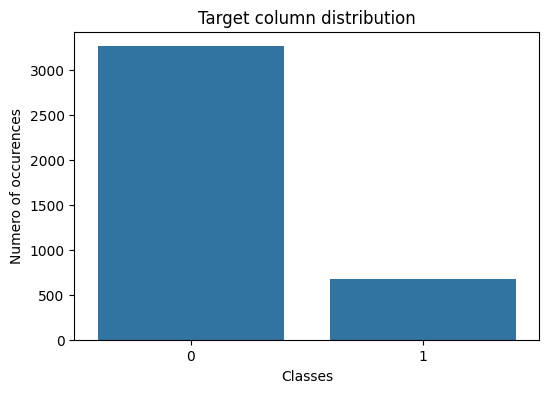

In [ ]:

target_col = 'Churn'


target_distribution = df[target_col].value_counts()


print("Distribuzione del target (numeri assoluti):")
print(target_distribution)


target_percentage = df[target_col].value_counts(normalize=True) * 100
print("\nDistribuzione del target (percentuale):")
print(target_percentage)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title("Target column distribution")
plt.xlabel("Classes")
plt.ylabel("Numero of occurences")
plt.show()


An imbalance in the target can hinder the effectiveness of model, leading to inaccurate predictions due to the uneven quality of the data. To improve model performance, it’s essential to address this imbalance in the next steps.

In [ ]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns Description:")
print(df[numeric_columns].describe())


Numeric Columns Description:
            Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  3747.000000      3772.000000               3941.000000   
mean     10.081398        15.650583                  3.679269   
std       8.498864         8.452301                  1.013938   
min       0.000000         5.000000                  1.000000   
25%       2.000000         9.000000                  3.000000   
50%       9.000000        14.000000                  4.000000   
75%      16.000000        21.000000                  4.000000   
max      61.000000       127.000000                  6.000000   

       SatisfactionScore  NumberOfAddress     Complain  DaySinceLastOrder  \
count        3941.000000      3941.000000  3941.000000        3728.000000   
mean            3.088302         4.237757     0.282416           4.531652   
std             1.381832         2.626699     0.450232           3.667648   
min             1.000000         1.000000     0.000000           0.000000   

Let's visualize the distribution of the categorical variables:

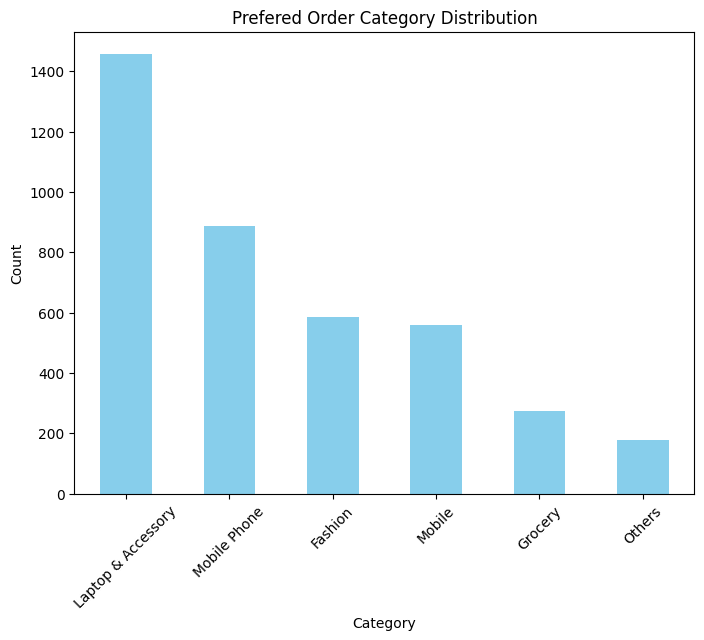

In [ ]:
import matplotlib.pyplot as plt


status_counts = df['PreferedOrderCat'].value_counts()


plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Prefered Order Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

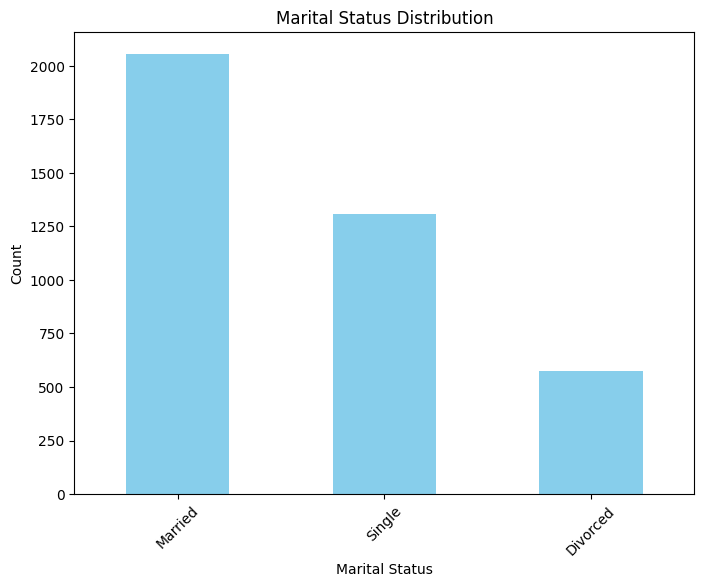

In [ ]:
import matplotlib.pyplot as plt

status_counts = df['MaritalStatus'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

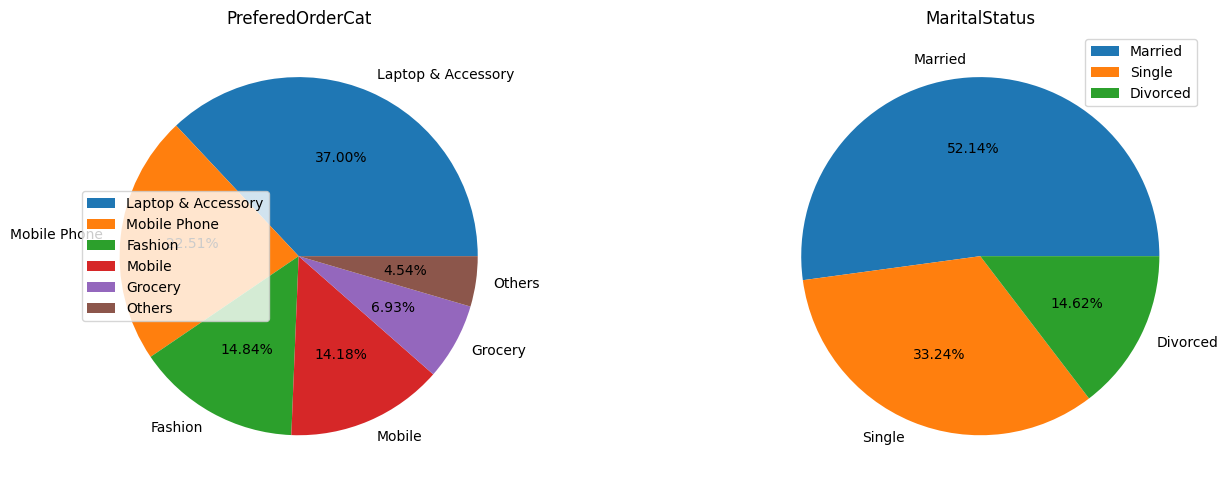

In [ ]:
import matplotlib.pyplot as plt


categorical_columns = df.select_dtypes(include=['object']).columns

n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()


for index, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    axes[index].pie(counts, autopct="%0.2f%%", labels=counts.index)
    axes[index].set_title(column)
    axes[index].legend(counts.index)

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()





It could be also interesting to see the distribution of the Number of Devices registered


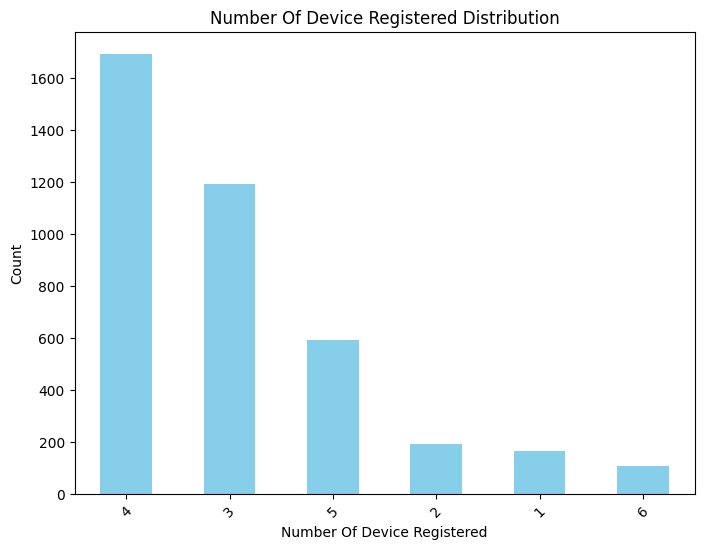

In [ ]:
import matplotlib.pyplot as plt

status_counts = df['NumberOfDeviceRegistered'].value_counts()


plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Number Of Device Registered Distribution')
plt.xlabel('Number Of Device Registered')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

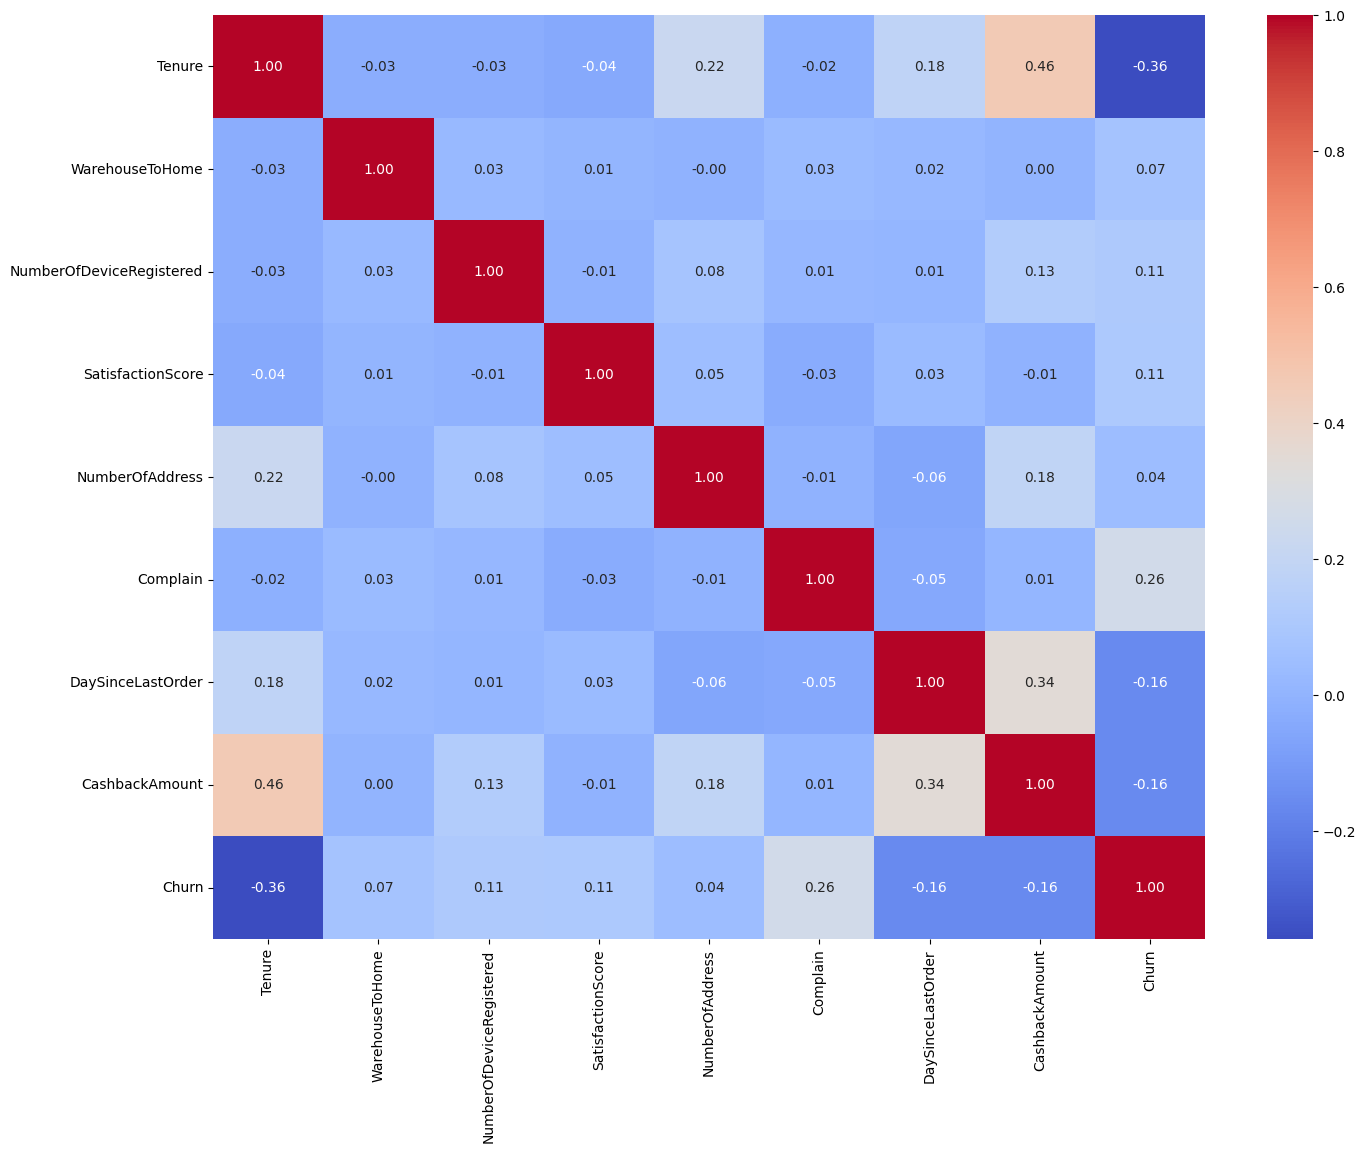

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(16, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)


plt.xticks(rotation=90)


plt.yticks(rotation=0)


plt.show()



Tenure has a negative correlation (-0.36) with churn. This suggests that customers who have been with the company for a longer time are less likely to churn.

CashbackAmount has a moderate negative correlation (-0.16) with churn. This might indicate that customers receiving higher cashback amounts are also less likely to churn.

DaySinceLastOrder has the same negative correlation (-0.16) which suggests that customers who haven’t placed an order for a longer time are more likely to churn

  Complain has a positive correlation (0.26) with churn, suggesting that customers who have made complaints are more likely to churn,  which makes sense as unsatisfied customers who make complaints may be more likely to leave.

  WarehouseToHome has low correlations with most other features, which suggests it doesn’t have a strong linear relationship with churn or the other features.

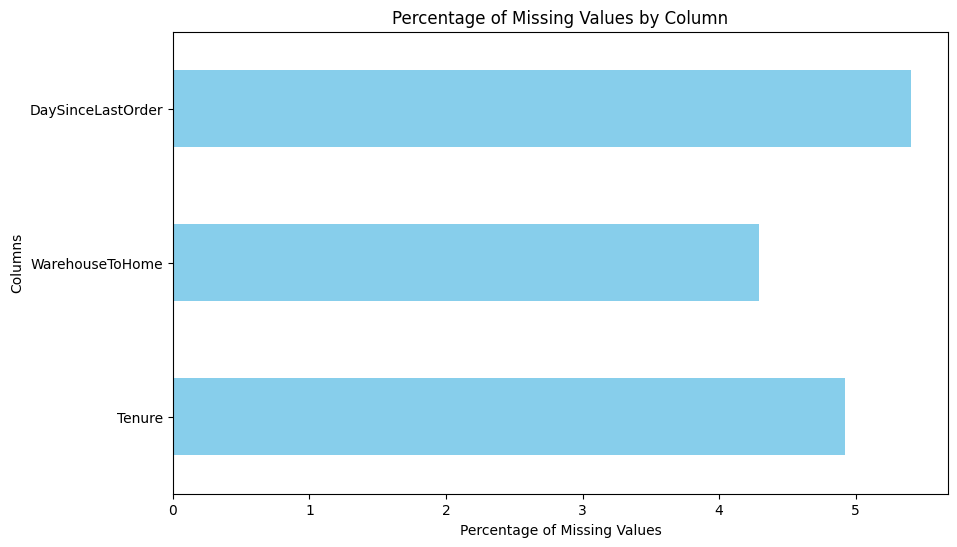

In [ ]:
import matplotlib.pyplot as plt


missing_percentage = (df.isnull().sum() / len(df)) * 100


missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

columns_with_missing = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']


df_high_missing = df[columns_with_missing]


imputer = KNNImputer(n_neighbors=5)
df_imputed_high_missing = pd.DataFrame(imputer.fit_transform(df_high_missing), columns=columns_with_missing)

df[columns_with_missing] = df_imputed_high_missing


print(df[columns_with_missing].isnull().sum())




Tenure               0
WarehouseToHome      0
DaySinceLastOrder    0
dtype: int64


To handle missing values I used the KNN imputer because it allows for more intelligent imputation by considering the relationships between data points. Instead of simply filling missing values with a mean or median, the KNN imputer uses similar rows (nearest neighbors) to estimate the missing values, preserving the overall structure and relationships in the dataset.

In [ ]:


!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

outliers = [
               'Tenure',
               'WarehouseToHome',
               'DaySinceLastOrder',
               'NumberOfDeviceRegistered',
               'SatisfactionScore',
               'NumberOfAddress',
               'Complain',
               'CashbackAmount'
            ]

col_names = outliers


n_cols = 2
n_rows = (len(col_names) + 1) // 2


fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=col_names)

for i, column in enumerate(col_names):
    row = i // 2 + 1
    col = i % 2 + 1

    fig.add_trace(
        go.Box(y=df[column], name=column),
        row=row, col=col
    )

fig.update_layout(
    height=300 * n_rows,
    width=1000,
    showlegend=False,
    title_text="Check Outliers"
)

# show the plot
fig.show()

From the outliers boxplot, we can observe that all columns contain outliers except for 'SatisfactionScore' and 'Complain'.

In the e-commerce sector, data distributions are frequently non-normal (especially, for example, for metrics like purchase frequency).

These outliers may represent distinctive customer behaviors or emerging trends in online shopping. Keeping this data can help the model better capture even not usual customer actions.

By retaining outliers, the model is expected to be more adaptable to different data patterns.

# **FEATURES SELECTION AND MODEL DEVELOPMENT**

(variables transormation, data partitioning by splitting train and test and cross-validation, development of different models, choice of the best model)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_columns = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
categorical_columns = ['PreferedOrderCat', 'MaritalStatus']

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)


df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)


df_final = pd.concat([df_scaled, df_encoded], axis=1)


print(f"Number of rows in features (X): {df_final.shape[0]}")
print(f"Number of rows in target (y): {df['Churn'].shape[0]}")

X = df_final
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Number of rows in features (X): 3941
Number of rows in target (y): 3941


Now, I implement the preprocessing pipeline...including handling missing values, scaling numerical features, encoding categorical variables, and splitting the data for training and testing.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

I used SMOTE to handle the class imbalance in the training data by generating synthetic samples for the minority class (churn=1). This ensures that the model is trained on a balanced dataset.

Distribution of the target (absolute numbers):
Churn
0    2282
1    2282
Name: count, dtype: int64

Distribution of the target (percentage):
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


<ipython-input-15-63ffd22f865d>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




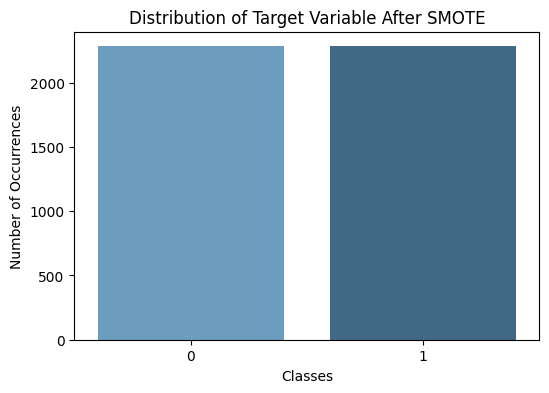

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

target_col = 'y_train'


target_distribution = y_train.value_counts()

print("Distribution of the target (absolute numbers):")
print(target_distribution)


target_percentage = y_train.value_counts(normalize=True) * 100
print("\nDistribution of the target (percentage):")
print(target_percentage)

plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='Blues_d')
plt.title("Distribution of Target Variable After SMOTE")
plt.xlabel("Classes")
plt.ylabel("Number of Occurrences")
plt.show()



 I aim to explore and test various machine learning models to develop a robust churn prediction model. By comparing multiple models( XGBoost, CatBoost, Random Forest and Logistic Regression) I want to identify the best-performing one.

To achieve this, I will
- optimize each model using GridSearchCV for hyperparameter tuning, ensuring the best configuration for each algorithm;

- evaluate model performance using key metrics such as accuracy, precision, recall, F1-score, and AUC, while visualizing ROC curves and confusion matrices to gain deeper insights into their predictive capabilities;
- compare models across these metrics to select the one that offers the best balance between accuracy and reliability in classifying churn;

Ultimately, the goal is to find the most effective model that can accurately predict customer churn and inform targeted retention strategies for the business.

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [50, 100, 200],           # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
    'max_depth': [3, 5, 7],                   # Maximum depth of a tree
    'subsample': [0.7, 0.8, 1.0],             # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 1.0],      # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]                    # Minimum loss reduction required to make a further partition
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',      # Metric to optimize
    n_jobs=-1,               # Use all available cores
    verbose=1                # Show progress
)

'''# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)'''


grid_search.fit(X_train, y_train)


print(f"Best Hyperparameters: {grid_search.best_params_}")


best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.8910
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       985
           1       0.67      0.70      0.68       198

    accuracy                           0.89      1183
   macro avg       0.80      0.81      0.81      1183
weighted avg       0.89      0.89      0.89      1183



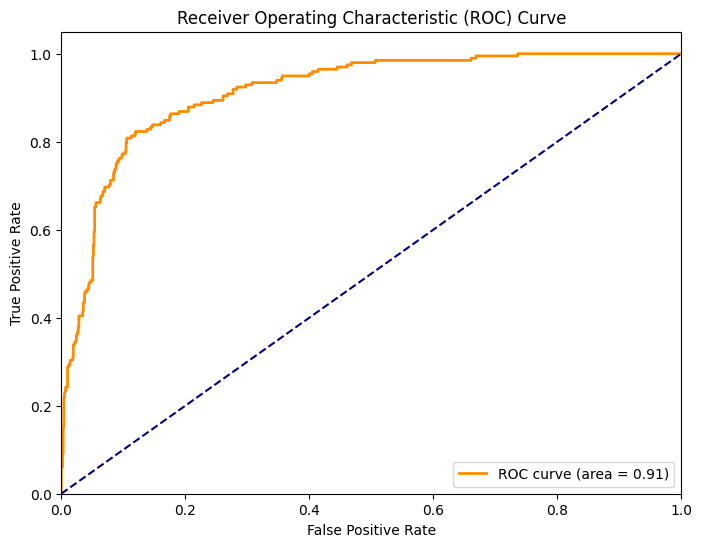

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = best_xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (churn=1)

fpr, tpr, _ = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<Figure size 1000x600 with 0 Axes>

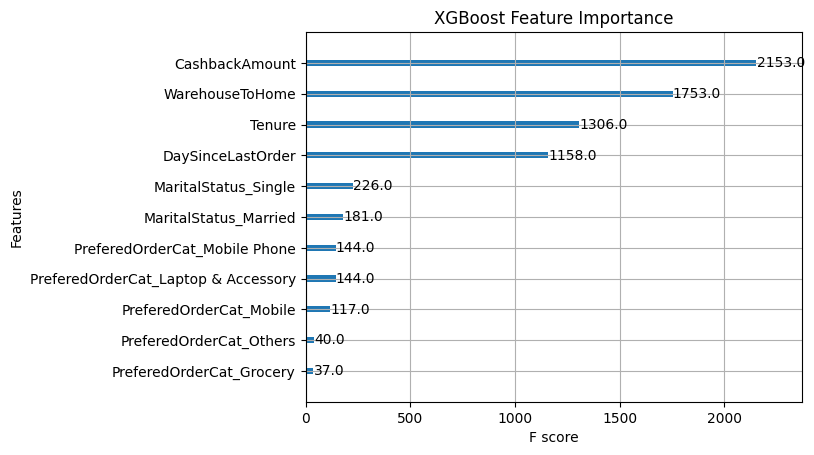

In [ ]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

Features such as Tenure, CashbackAmount, and WarehouseToHome might be the most important in predicting whether a customer is likely to churn.

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


param_grid = {
    'iterations': [100, 200, 300],          # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate
    'depth': [4, 6, 8],                     # Depth of trees
    'l2_leaf_reg': [1, 3, 5],               # L2 regularization term
    'border_count': [32, 50, 100]           # Number of splits for numerical features
}


catboost_model = CatBoostClassifier(loss_function='Logloss', verbose=0, random_state=42)


grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize
    n_jobs=-1,                # Use all available cores
    verbose=1                 # Show progress
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")


best_catboost_model = grid_search.best_estimator_

y_pred = best_catboost_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'border_count': 100, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.2}
Accuracy: 0.8994
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       985
           1       0.74      0.62      0.67       198

    accuracy                           0.90      1183
   macro avg       0.83      0.79      0.81      1183
weighted avg       0.89      0.90      0.90      1183



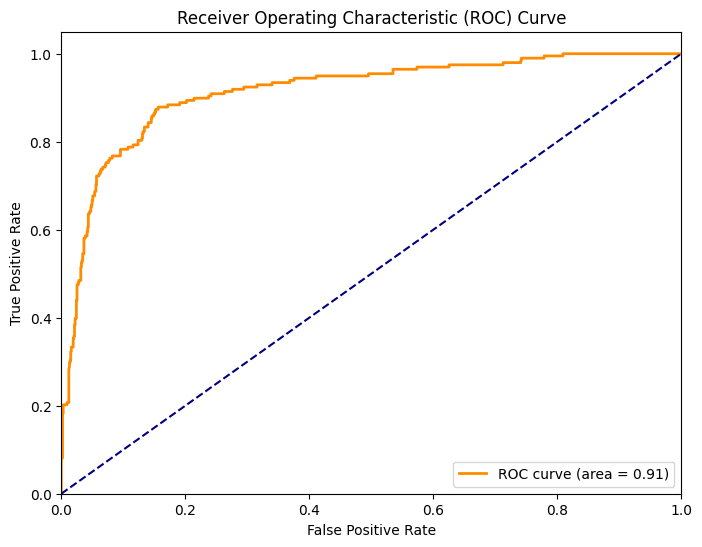

In [ ]:
y_probs = best_catboost_model.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                                Feature  Importance
0                                Tenure   24.669042
3                        CashbackAmount   19.031541
1                       WarehouseToHome   18.884241
2                     DaySinceLastOrder   17.442771
10                 MaritalStatus_Single    6.135103
5   PreferedOrderCat_Laptop & Accessory    5.140713
9                 MaritalStatus_Married    3.419340
7         PreferedOrderCat_Mobile Phone    3.168911
6               PreferedOrderCat_Mobile    0.866170
4              PreferedOrderCat_Grocery    0.675847
8               PreferedOrderCat_Others    0.566321


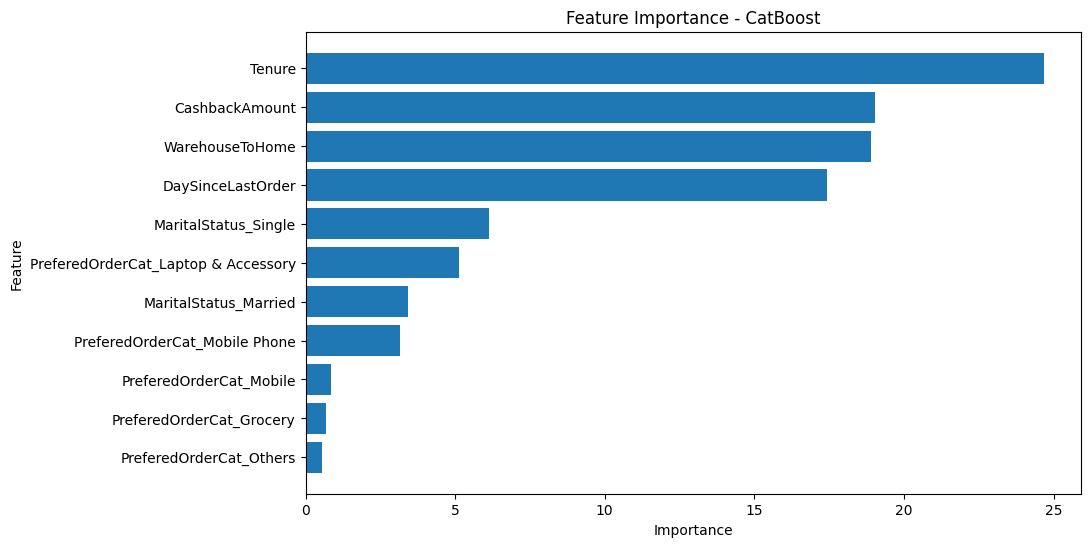

In [ ]:


feature_importance = best_catboost_model.get_feature_importance()
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - CatBoost')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [5, 10, 15, None],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}


rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize
    n_jobs=-1,                # Use all available cores
    verbose=1                 # Show progress
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

grid_search.fit(X_train, y_train)


print(f"Best Hyperparameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_


y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8969
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       985
           1       0.72      0.62      0.67       198

    accuracy                           0.90      1183
   macro avg       0.82      0.79      0.80      1183
weighted avg       0.89      0.90      0.89      1183



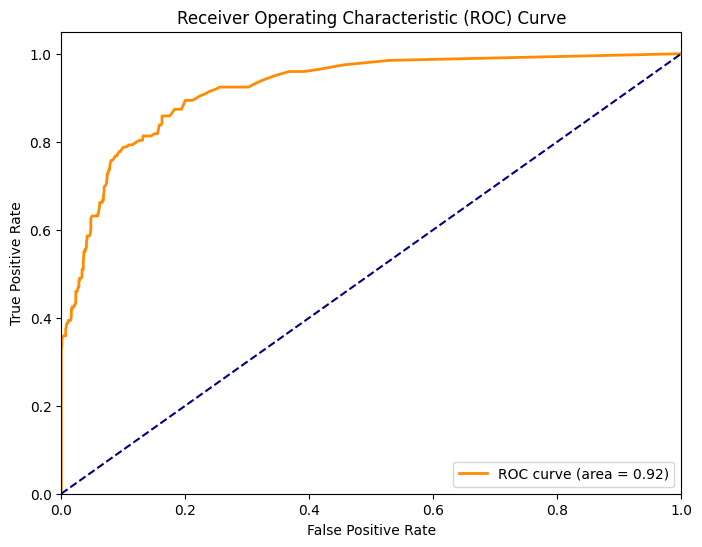

In [ ]:
y_probs = best_rf_model.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_probs)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                                Feature  Importance
3                        CashbackAmount    0.300963
0                                Tenure    0.298292
1                       WarehouseToHome    0.177757
2                     DaySinceLastOrder    0.126389
10                 MaritalStatus_Single    0.033463
5   PreferedOrderCat_Laptop & Accessory    0.015405
9                 MaritalStatus_Married    0.015151
7         PreferedOrderCat_Mobile Phone    0.014220
6               PreferedOrderCat_Mobile    0.011247
4              PreferedOrderCat_Grocery    0.004543
8               PreferedOrderCat_Others    0.002571


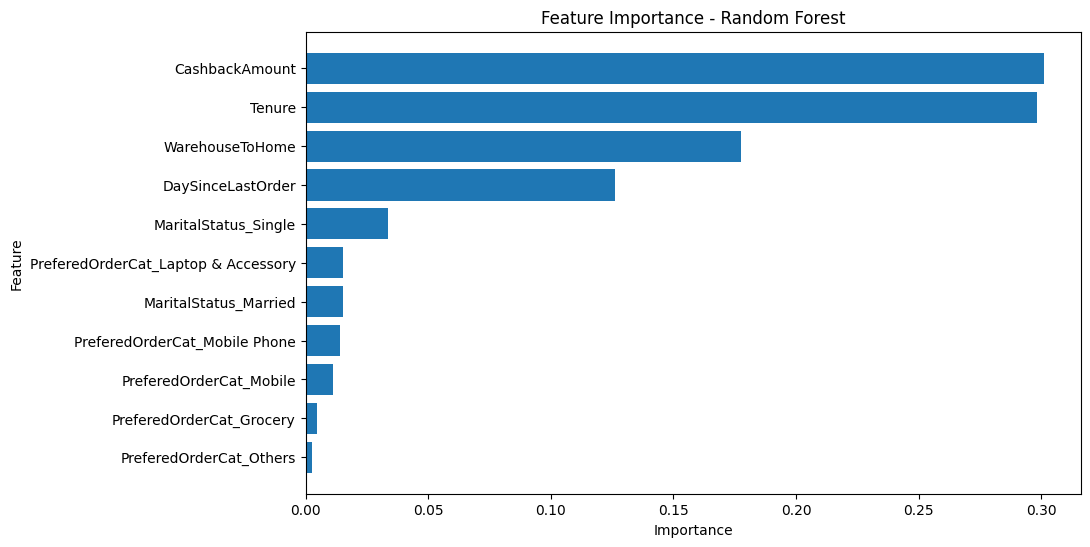

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


feature_importance_rf = best_rf_model.feature_importances_
feature_names_rf = X_train.columns


importance_df_rf = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)


print(importance_df_rf)


plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],                # Solvers that support L1 and L2 penalties
    'max_iter': [100, 200, 300]                     # Maximum number of iterations
}


logreg_model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize
    n_jobs=-1,                # Use all available cores
    verbose=1                 # Show progress
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


grid_search.fit(X_train, y_train)


print(f"Best Hyperparameters: {grid_search.best_params_}")


best_logreg_model = grid_search.best_estimator_


y_pred = best_logreg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8478
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       985
           1       0.64      0.21      0.32       198

    accuracy                           0.85      1183
   macro avg       0.75      0.59      0.62      1183
weighted avg       0.82      0.85      0.81      1183



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

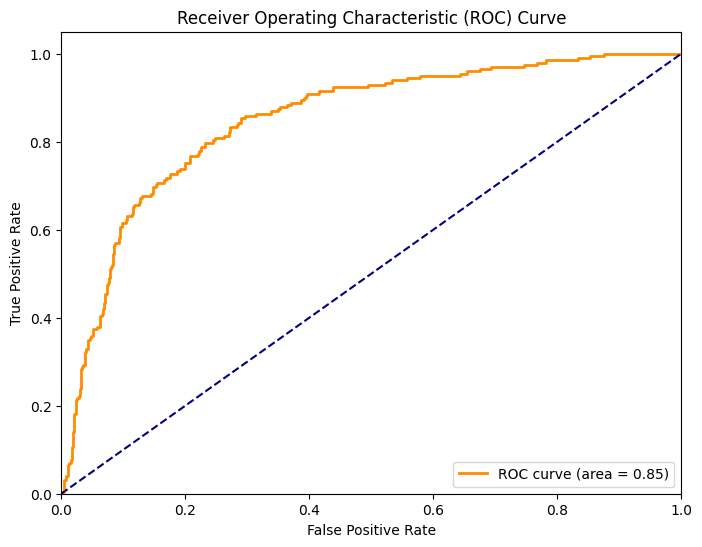

In [ ]:


y_probs = best_logreg_model.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_probs)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


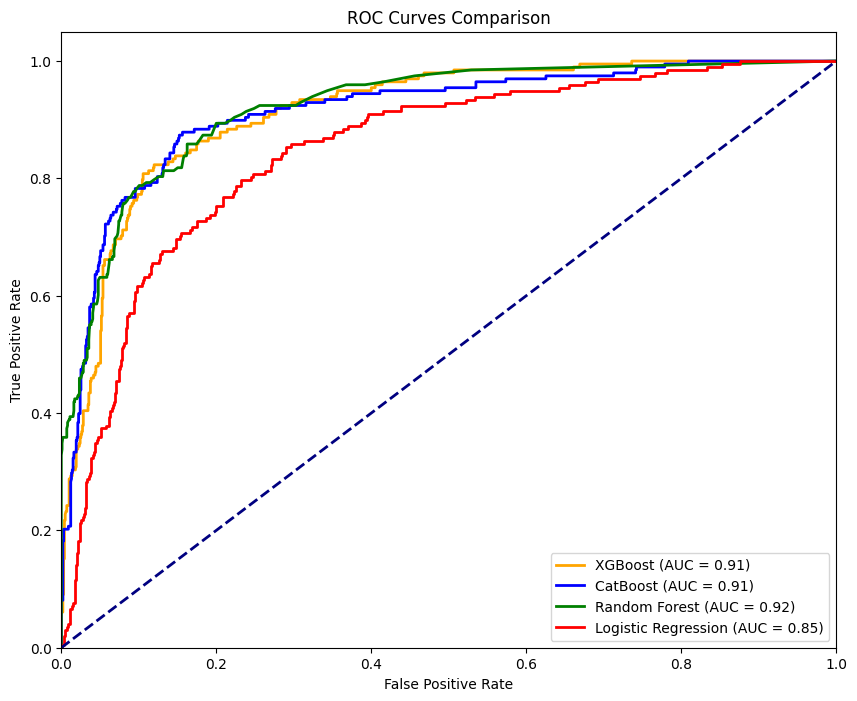

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_probs_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_probs_cat = best_catboost_model.predict_proba(X_test)[:, 1]
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_probs_logreg = best_logreg_model.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_probs_cat)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)


roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_cat = auc(fpr_cat, tpr_cat)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)


plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', lw=2, color='orange')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_cat:.2f})', lw=2, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', lw=2, color='green')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', lw=2, color='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()


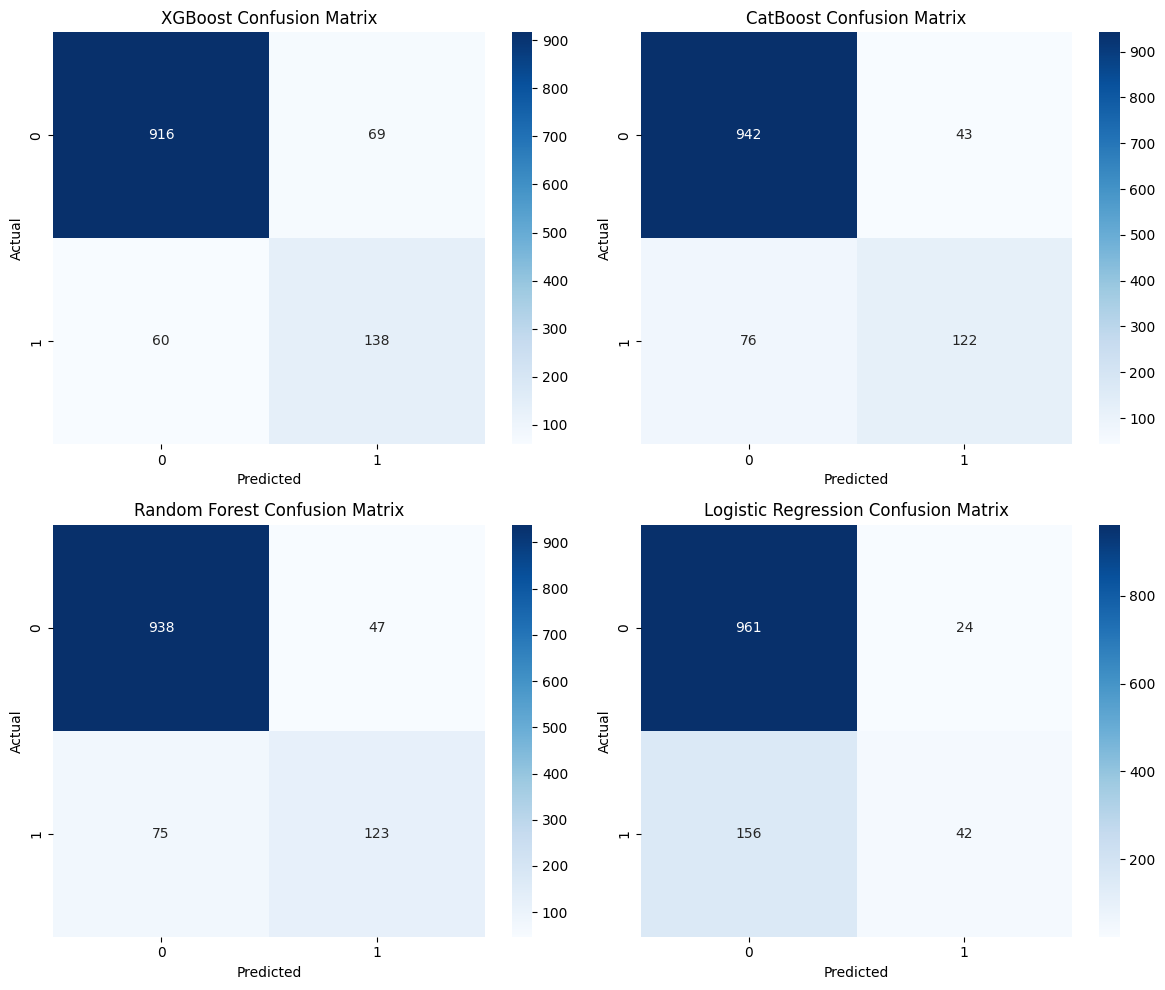

In [ ]:
# Get the predictions for all models
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_cat = best_catboost_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_logreg = best_logreg_model.predict(X_test)

# Compute confusion matrices for all models
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_cat = confusion_matrix(y_test, y_pred_cat)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title("XGBoost Confusion Matrix")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("CatBoost Confusion Matrix")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title("Random Forest Confusion Matrix")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title("Logistic Regression Confusion Matrix")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Random Forest is the best-performing model overall, with the highest AUC and a strong balance between true positives and true negatives, making it the most reliable in terms of churn prediction. Anyway also the XGBoost and CatBoost seemes reliable.

# **MODEL RESULTS AND BUSINESS INSIGHTS**

The interpretation of the Random Forest, XGBoost, and CatBoost models allows for actionable insights into customer churn. The models highlight key areas to focus on, such as improving loyalty programs, addressing customer complaints, and targeting high-risk customers based on tenure and recent activity. Based on the analysis, key features that are likely driving churn predictions include: Tenure, CashBack Amount,Warehouse to Home, Days Since the Last Order, Complain.




# **SYSTEM INTEGRATION**

It can be interesting to demonstrate how to use the trained model to predict churn for a new, hypothetical customer.

I wanted to exemplifies system integration by showing how the RF model can be deployed into a system for real-time prediction. It integrates preprocessing pipelines, aligns new data with the training data and generates predictions.

In [ ]:
import pandas as pd


new_customer_data_raw = pd.DataFrame({
    'Tenure': [50],  # Example tenure value
    'WarehouseToHome': [5],  # Example distance from warehouse to home
    'DaySinceLastOrder': [30],  # Example days since last order
    'CashbackAmount': [200],  # Example cashback amount
    'PreferedOrderCat': ['Food'],  # Example categorical variable
    'MaritalStatus': ['Married']  # Example categorical variable
})




numeric_columns = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
new_customer_data_scaled = pd.DataFrame(scaler.transform(new_customer_data_raw[numeric_columns]),
                                        columns=numeric_columns)


categorical_columns = ['PreferedOrderCat', 'MaritalStatus']
new_customer_data_encoded = pd.get_dummies(new_customer_data_raw[categorical_columns], drop_first=True)


new_customer_data_transformed = pd.concat([new_customer_data_scaled, new_customer_data_encoded], axis=1)

new_customer_data_transformed = new_customer_data_transformed.reindex(columns=X_train.columns, fill_value=0)


prediction = best_rf_model.predict(new_customer_data_transformed)


print(f"Predicted class for the new customer: {prediction[0]}")

predicted_prob = best_rf_model.predict_proba(new_customer_data_transformed)
print(f"Predicted probability for the new customer: {predicted_prob[0]}")



Predicted class for the new customer: 0
Predicted probability for the new customer: [0.955 0.045]
